In [107]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df_stock = pd.read_csv("NULBdata.csv")

In [3]:
df_stock.head()

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,2476,06/04/2011,225,225,225,225,0.0,64,"14,400.00"
1,2475,12/05/2011,225,229,225,225,0.0,59,"13,427.00"
2,2474,15/05/2011,225,229,229,229,0.0,57,"13,053.00"
3,2473,16/05/2011,229,230,230,230,0.0,20,"4,600.00"
4,2472,18/05/2011,230,230,230,230,0.0,22,"5,060.00"


In [4]:

df_stock

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,2476,06/04/2011,225,225,225,225,0.00,64,"14,400.00"
1,2475,12/05/2011,225,229,225,225,0.00,59,"13,427.00"
2,2474,15/05/2011,225,229,229,229,0.00,57,"13,053.00"
3,2473,16/05/2011,229,230,230,230,0.00,20,"4,600.00"
4,2472,18/05/2011,230,230,230,230,0.00,22,"5,060.00"
...,...,...,...,...,...,...,...,...,...
2471,5,09/05/2024,683,689.6,662.6,670,-0.89,"14,540.00","97,68,167.80"
2472,4,12/05/2024,670,670,650.3,650.3,-2.94,"6,884.00","45,11,826.40"
2473,3,13/05/2024,650,658,645,651,0.11,"5,463.00","35,48,046.70"
2474,2,14/05/2024,655,674.9,655,671,3.07,"18,718.00","1,25,18,869.30"


In [5]:


df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.N.      2476 non-null   int64  
 1   Date      2476 non-null   object 
 2   Open      2476 non-null   object 
 3   High      2476 non-null   object 
 4   Low       2476 non-null   object 
 5   Ltp       2476 non-null   object 
 6   % Change  2476 non-null   float64
 7   Qty       2476 non-null   object 
 8   Turnover  2476 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 174.2+ KB


In [6]:

df_stock.shape
     


(2476, 9)

     Open
0     225
1     225
2     225
3     229
4     230
...   ...
2471  683
2472  670
2473  650
2474  655
2475  675

[2476 rows x 1 columns]


In [10]:
df_stock=df_stock.rename(columns={'% Change':'Change'})


In [11]:
df_stock['Date'] = pd.to_datetime(df_stock.index, dayfirst=True) 

In [12]:

df_stock['Open'] = df_stock['Open'].astype(str)
df_stock['High'] = df_stock['High'].astype(str)
df_stock['Low'] = df_stock['Low'].astype(str)
df_stock['Ltp'] = df_stock['Ltp'].astype(str)
df_stock['Qty'] = df_stock['Qty'].astype(str)
df_stock['Turnover'] = df_stock['Turnover'].astype(str)


df_stock['Open'] = df_stock['Open'].str.replace(',', '').astype(float)
df_stock['High'] = df_stock['High'].str.replace(',', '').astype(float)
df_stock['Low'] = df_stock['Low'].str.replace(',', '').astype(float)
df_stock['Ltp'] = df_stock['Ltp'].str.replace(',', '').astype(float)
df_stock['Qty'] = df_stock['Qty'].str.replace(',', '').astype(float)
df_stock['Turnover'] = df_stock['Turnover'].str.replace(',', '').astype(float)
df_stock['Change'] = df_stock['Change'].astype(float)
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')


df_stock['day_of_week'] = df_stock['Date'].dt.dayofweek
df_stock['month'] = df_stock['Date'].dt.month

In [13]:
training_set = df_stock.iloc[:,2:3]
print(training_set)

       Open
0     225.0
1     225.0
2     225.0
3     229.0
4     230.0
...     ...
2471  683.0
2472  670.0
2473  650.0
2474  655.0
2475  675.0

[2476 rows x 1 columns]


In [17]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.02947033],
       [0.02947033],
       [0.02947033],
       ...,
       [0.19872561],
       [0.20071685],
       [0.2086818 ]])

In [19]:

data_close = df_stock.reset_index()['Ltp']

In [20]:

data_close

0       225.0
1       225.0
2       229.0
3       230.0
4       230.0
        ...  
2471    670.0
2472    650.3
2473    651.0
2474    671.0
2475    660.1
Name: Ltp, Length: 2476, dtype: float64

In [21]:

data_close.shape

(2476,)

In [22]:

import matplotlib.pyplot as plt
plt.plot(data_close)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [24]:

data
     

array([[0.02947033],
       [0.02947033],
       [0.03106332],
       ...,
       [0.19912386],
       [0.20708881],
       [0.20274791]])

In [25]:

#Splitting into Train nd Test
training_size = int(len(data)*0.65)
test_size = len(data)-training_size
training_data , test_data = data[0:training_size,:],data[training_size:len(data),:1]

In [26]:


training_size , test_size

(1609, 867)

In [27]:


training_data

array([[0.02947033],
       [0.02947033],
       [0.03106332],
       ...,
       [0.3297491 ],
       [0.33174034],
       [0.33014735]])

In [28]:


test_data

array([[0.32935086],
       [0.33094385],
       [0.33014735],
       [0.32656312],
       [0.33014735],
       [0.33014735],
       [0.32895261],
       [0.32696137],
       [0.32696137],
       [0.32616487],
       [0.32457188],
       [0.32337714],
       [0.32417364],
       [0.32656312],
       [0.3221824 ],
       [0.32696137],
       [0.32656312],
       [0.32616487],
       [0.32576663],
       [0.32616487],
       [0.32497013],
       [0.32258065],
       [0.32616487],
       [0.32935086],
       [0.32935086],
       [0.33014735],
       [0.33452808],
       [0.33412983],
       [0.33811231],
       [0.3480685 ],
       [0.35005974],
       [0.34607726],
       [0.34289128],
       [0.34289128],
       [0.35005974],
       [0.34966149],
       [0.33811231],
       [0.33373158],
       [0.33651932],
       [0.33771406],
       [0.33651932],
       [0.33333333],
       [0.33811231],
       [0.35364397],
       [0.35603345],
       [0.36638789],
       [0.36837913],
       [0.377

In [29]:

import numpy

def create_matrix(dataset,time_step=1):
  dataX , dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]  #i=0 , 0,1,2,3 4th will be appended in next line of code if time_step = 3
    dataX.append(a)     #Contains all values from 1 to Time_step
    dataY.append(dataset[i+time_step , 0])   #Contains just the end value to Time_step
  return numpy.array(dataX) , numpy.array(dataY)


In [30]:

#shaping into X=t , t+1 , t+2 , t+3 and t+4

time_step = 100
X_train, y_train = create_matrix(training_data, time_step)
X_test , y_test = create_matrix(test_data , time_step)

In [31]:

X_train

array([[0.02947033, 0.02947033, 0.03106332, ..., 0.02747909, 0.02787734,
        0.02787734],
       [0.02947033, 0.03106332, 0.03146157, ..., 0.02787734, 0.02787734,
        0.0266826 ],
       [0.03106332, 0.03146157, 0.03146157, ..., 0.02787734, 0.0266826 ,
        0.02827559],
       ...,
       [0.29510155, 0.29828753, 0.29988053, ..., 0.33014735, 0.32815611,
        0.33293509],
       [0.29828753, 0.29988053, 0.29988053, ..., 0.32815611, 0.33293509,
        0.33572282],
       [0.29988053, 0.29988053, 0.3122262 , ..., 0.33293509, 0.33572282,
        0.3297491 ]])

In [32]:

X_train.shape #Contains all 6703 rows with 100 columns of values

(1508, 100)

In [33]:
y_train.shape

(1508,)

In [34]:

#Re-shaping input to give to LSTM into 3-D so we will add another dimension to it

X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [37]:

#LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [38]:

#Stacked LSTM
model = Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

/opt/anaconda3/envs/Model/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:

#The 50 after LSTM means 50 internal Layers in that particular LSTM
#Return_sequence have to understand properlyj
     

In [40]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X_train , y_train , validation_data = (X_test,y_test) , epochs=100 , batch_size=64 , verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.1118 - val_loss: 0.0095
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0069 - val_loss: 0.0020
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0031 - val_loss: 9.1836e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0028 - val_loss: 9.3374e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0024 - val_loss: 7.6472e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0025 - val_loss: 8.3169e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0020 - val_loss: 6.9902e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0022 - val_loss: 8.8052e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0022 - val_loss: 7.0254e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0022 - val_loss: 7.6203e-04
Epoch 12/100
24/24 ━

In [42]:

#Doing prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [43]:

#Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
     

In [44]:
train_predict.shape

(1508, 1)

In [45]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))
     

1388.2424775018126

In [46]:

math.sqrt(mean_squared_error(y_test , test_predict))

1108.3166206782194

In [47]:
plt.plot(train_predict)

In [48]:
plt.plot(test_predict)

In [49]:
plt.plot(data_close)

In [50]:

len(test_data) 

867

(1, 0)

In [53]:

#To predict next day we need latest 100 days of data
x_input=test_data[767:].reshape(1,-1)
x_input.shape
     

(1, 100)

In [54]:


temp_input=list(x_input)
temp_input=temp_input[0].tolist()

NameError: name 'temp_input' is not defined

In [55]:

temp_input

[0.17841497411389884,
 0.1827956989247312,
 0.18084428514536044,
 0.19155714854639588,
 0.20270808442851457,
 0.20270808442851457,
 0.19876543209876546,
 0.19593787335722823,
 0.19080047789725213,
 0.1836320191158901,
 0.1872162485065711,
 0.18637992831541217,
 0.1847869374751095,
 0.18837116686579053,
 0.1847869374751095,
 0.18797291915571485,
 0.1919553962564715,
 0.19792911190760654,
 0.1967741935483871,
 0.22246117084826766,
 0.21027479091995221,
 0.22660294703305456,
 0.22660294703305456,
 0.21465551573078456,
 0.21314217443249706,
 0.20708880923934686,
 0.2094782954998009,
 0.20708880923934686,
 0.20350457984866588,
 0.20788530465949823,
 0.20868180007964954,
 0.20370370370370372,
 0.20230983671843888,
 0.19633612106730386,
 0.1935483870967742,
 0.19669454400637199,
 0.20063719633612104,
 0.19753086419753085,
 0.20669056152927123,
 0.20549581839904424,
 0.20270808442851457,
 0.1935483870967742,
 0.20063719633612104,
 0.19912385503783353,
 0.19633612106730386,
 0.19076065312624452

In [56]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20192558]
101
1 day input [0.1827957  0.18084429 0.19155715 0.20270808 0.20270808 0.19876543
 0.19593787 0.19080048 0.18363202 0.18721625 0.18637993 0.18478694
 0.18837117 0.18478694 0.18797292 0.1919554  0.19792911 0.19677419
 0.22246117 0.21027479 0.22660295 0.22660295 0.21465552 0.21314217
 0.20708881 0.2094783  0.20708881 0.20350458 0.2078853  0.2086818
 0.2037037  0.20230984 0.19633612 0.19354839 0.19669454 0.2006372
 0.19753086 0.20669056 0.20549582 0.20270808 0.19354839 0.2006372
 0.19912386 0.19633612 0.19076065 0.18837117 0.18407009 0.17722023
 0.18080446 0.18235763 0.18239745 0.17483074 0.17642374 0.18558343
 0.18470729 0.18128236 0.18379132 0.1962963  0.20748706 0.20748706
 0.19593787 0.19593787 0.20270808 0.20270808 0.20589407 0.20195141
 0.19685384 0.19852648 0.2003186  0.19506173 0.19076065 0.19036241
 0.19673437 0.19824771 0.20083632 0.20071685 0.19792911 0.20071685
 0.20430108 0.19713262 0.19593787 0.1911589  0.19076065 0.18900836
 0.18677818 0.18598168 0.190681   0.

In [57]:

len(temp_input)

101

In [58]:

day_new=np.arange(1,101) #new day with a total of 101 now
day_pred=np.arange(101,131)  #predicted 30+ days from the previous days

In [84]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


#read the file  this data is for Apple stocks 
df_stock = pd.read_csv('NULBdata.csv')

#print the head
df_stock.head()

,S.N.,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,2476,06/04/2011,225,225,225,225,0.0,64,"14,400.00"
1,2475,12/05/2011,225,229,225,225,0.0,59,"13,427.00"
2,2474,15/05/2011,225,229,229,229,0.0,57,"13,053.00"
3,2473,16/05/2011,229,230,230,230,0.0,20,"4,600.00"
4,2472,18/05/2011,230,230,230,230,0.0,22,"5,060.00"


In [85]:
df_stock=df_stock.rename(columns={'% Change':'Change'})
df_stock['Date'] = pd.to_datetime(df_stock.index, dayfirst=True) 
df_stock['Open'] = df_stock['Open'].astype(str)
df_stock['High'] = df_stock['High'].astype(str)
df_stock['Low'] = df_stock['Low'].astype(str)
df_stock['Ltp'] = df_stock['Ltp'].astype(str)
df_stock['Qty'] = df_stock['Qty'].astype(str)
df_stock['Turnover'] = df_stock['Turnover'].astype(str)


df_stock['Open'] = df_stock['Open'].str.replace(',', '').astype(float)
df_stock['High'] = df_stock['High'].str.replace(',', '').astype(float)
df_stock['Low'] = df_stock['Low'].str.replace(',', '').astype(float)
df_stock['Ltp'] = df_stock['Ltp'].str.replace(',', '').astype(float)
df_stock['Qty'] = df_stock['Qty'].str.replace(',', '').astype(float)
df_stock['Turnover'] = df_stock['Turnover'].str.replace(',', '').astype(float)
df_stock['Change'] = df_stock['Change'].astype(float)
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')

In [86]:

df_stock.index=df['Date']
# we plot the close values for visualization (as they are our target)
plt.figure(figsize=(15,8))
plt.plot(df_stock.Ltp,label='Ltp Price History')

In [87]:
#creating data frame with only 2 variables : Data and Close 
data=df_stock.sort_index(ascending=True,axis=0)#sorting
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Ltp'])##creating a separate dataset

for i in range (0,len(data)):
     new_data['Date'][i]=data['Date'][i]
     new_data['Ltp'][i]=data['Ltp'][i]

/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/3789044200.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Date'][i]=data['Date'][i]
/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/3789044200.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instea

In [88]:
import pandas as pd
import numpy as np
import re

def add_datepart(df, fldname, drop=True, time=False):
    """
    Adds columns for year, month, ISO week, day, and other date-related fields.
    """
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld)  # 'infer_datetime_format' is no longer needed
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start']
    if time:
        attr += ['Hour', 'Minute', 'Second']

    # Add ISO Week separately using isocalendar()
    df[targ_pre + 'Week'] = fld.dt.isocalendar().week

    for n in attr:
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    if drop:
        df.drop(fldname, axis=1, inplace=True)





In [89]:
add_datepart(new_data, 'Date')

In [83]:
print(new_data.columns)



Index(['Ltp', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start'],
      dtype='object')


In [90]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/3642555270.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data['mon_fri'][i] = 0
/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/3642555270.py:6: Sett

In [91]:
new_data


,Ltp,Week,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,mon_fri
0,1209.0,1,1970,1,1,3,1,False,True,False,True,0
1,1260.0,1,1970,1,1,3,1,False,True,False,True,0
2,1234.0,1,1970,1,1,3,1,False,True,False,True,0
3,730.0,1,1970,1,1,3,1,False,True,False,True,0
4,790.0,1,1970,1,1,3,1,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2471,1604.0,1,1970,1,1,3,1,False,True,False,True,0
2472,1187.0,1,1970,1,1,3,1,False,True,False,True,0
2473,741.0,1,1970,1,1,3,1,False,True,False,True,0
2474,777.0,1,1970,1,1,3,1,False,True,False,True,0


In [93]:
#split into train and validation
train = new_data[:200]
valid = new_data[200:]
x_train = train.drop('Ltp', axis=1)
y_train = train['Ltp']
x_valid = valid.drop('Ltp', axis=1)
y_valid = valid['Ltp']

In [95]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Ltp'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Ltp'][i] = data['Ltp'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/2654733013.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_data['Date'][i] = data['Date'][i]
/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/2654733013

In [100]:
new_data['Ltp'] = new_data['Ltp'].astype(str)
new_data['Ltp'] = new_data['Ltp'].str.replace(',', '').astype(float)


In [101]:
#creating train and test sets
dataset = new_data.values



train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [102]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10


/opt/anaconda3/envs/Model/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


140/140 - 2s - 11ms/step - loss: 7.3932e-04
Epoch 2/10
140/140 - 1s - 7ms/step - loss: 7.0496e-04
Epoch 3/10
140/140 - 1s - 7ms/step - loss: 4.3601e-04
Epoch 4/10
140/140 - 1s - 7ms/step - loss: 6.0327e-04
Epoch 5/10
140/140 - 1s - 7ms/step - loss: 3.3959e-04
Epoch 6/10
140/140 - 1s - 7ms/step - loss: 4.3282e-04
Epoch 7/10
140/140 - 1s - 7ms/step - loss: 3.7734e-04
Epoch 8/10
140/140 - 1s - 7ms/step - loss: 2.5433e-04
Epoch 9/10
140/140 - 1s - 7ms/step - loss: 2.5991e-04
Epoch 10/10
140/140 - 1s - 7ms/step - loss: 3.7429e-04


In [103]:
#predicting the values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [104]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [105]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

np.float64(171.13728538493584)

/var/folders/7c/t7xk5xzs13b_2t3d5fd1zg4w0000gn/T/ipykernel_23353/1387250358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


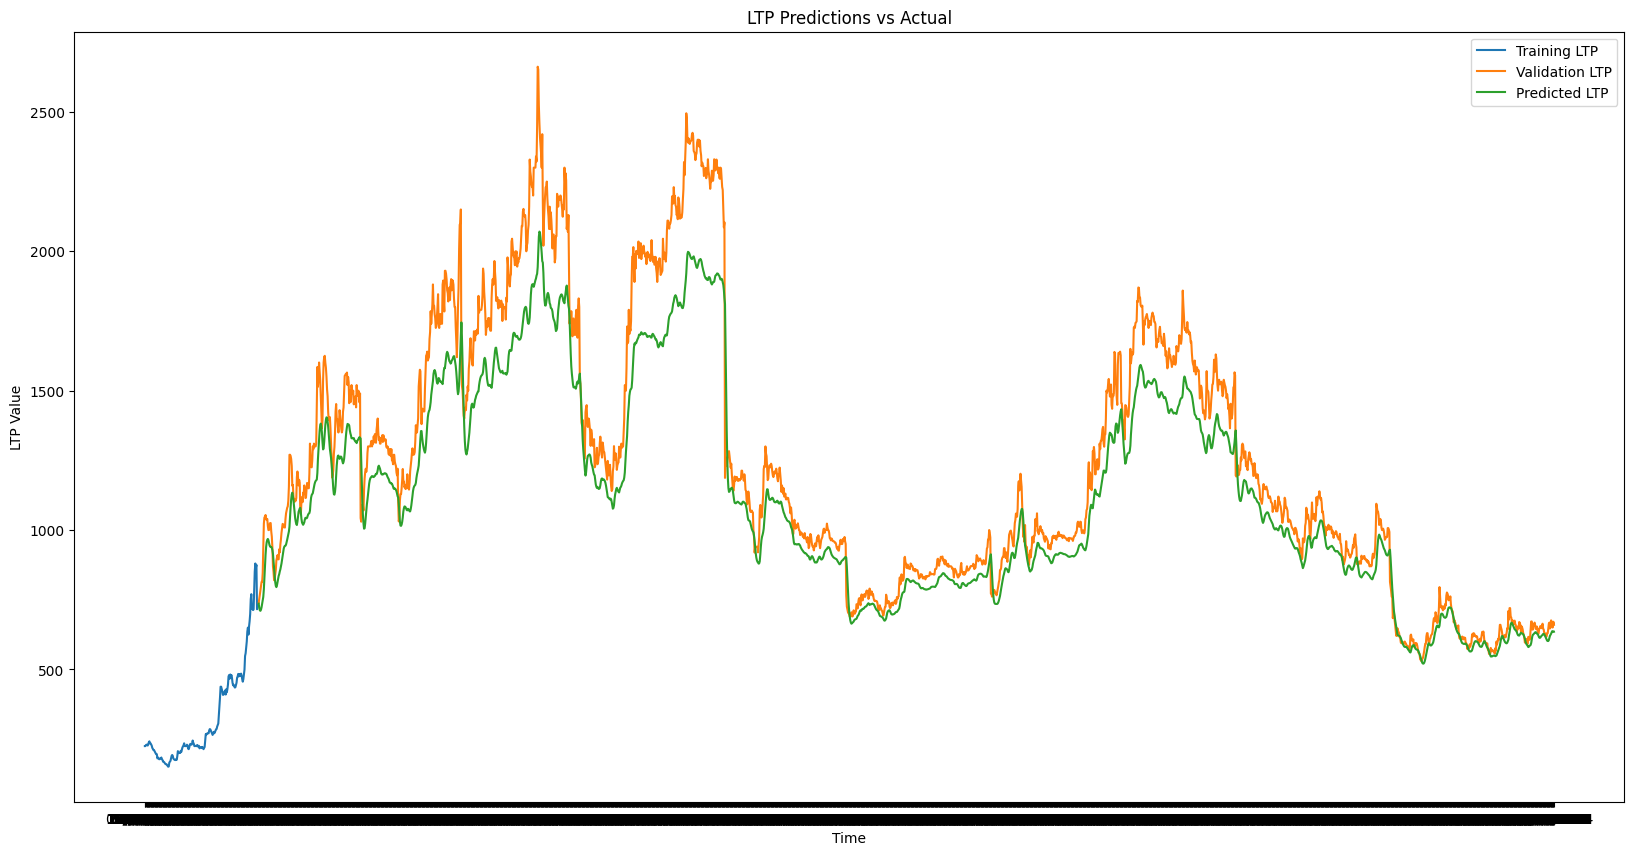

In [111]:
import matplotlib.pyplot as plt

# Make sure closing_price has the same length as valid
valid['Predictions'] = closing_price

# Plotting the training data
plt.plot(train['Ltp'], label='Training LTP')

# Plotting the validation data for actual values and predictions
plt.plot(valid['Ltp'], label='Validation LTP')
plt.plot(valid['Predictions'], label='Predicted LTP')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('LTP Value')
plt.title('LTP Predictions vs Actual')

# Add a legend
plt.legend()

# Show the plot
plt.show()
